In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
custom_ngram_df = pd.read_pickle('../Data/01_clean_sf_custom_ngram')

In [3]:
custom_ngram_df.head()

,company_name,job_title,listed_items,url
0,Gap Inc. Corporate,"Software Engineer, Price Execution",write build product according business conduct...,https://www.indeed.com/rc/clk?jk=77d524a7cf198...
1,WrkShp,Business Analyst,closely product assist investigation deep dive...,https://www.indeed.com/company/WrkShp/jobs/Bus...
2,Ceres Imaging,Image Processing: GIS / Remote Sensing Analyst,proficiency gi e g arcgis envi processing prod...,https://www.indeed.com/rc/clk?jk=8f702cd563785...
3,Deloitte,"Analyst, Strategy and Research",effectively interpret client request use tacti...,https://www.indeed.com/rc/clk?jk=8a288a5c5a09d...
4,Turing Video,Computer Vision Software Engineer,maintain existing implement algorithm necessar...,https://www.indeed.com/rc/clk?jk=fcf308f2fee2a...


### TF-IDF - KMeans

In [4]:
tf_idf = TfidfVectorizer(max_df=0.95)
tf_idf_array = tf_idf.fit_transform(custom_ngram_df.listed_items).toarray()
tf_idf_df = pd.DataFrame(tf_idf_array,columns=tf_idf.get_feature_names())
tf_idf_df.shape

(3364, 15385)

In [5]:
tf_idf_df.values.transpose()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
tf_idf_df.head()

,aa,aaa,aaai,aac,aad,aami,aapc,aaproot_cause,aashto,aav,...,zoura,zpn,zuckerberg,zurb,zvs,zweigwhite,zymergen,zymo,zynga,ºc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
inertia = []
i = 2
while i <= 26:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,n_init=5)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

In [8]:
inertia

[3166.2771416743185,
 3142.667508304786,
 3124.677508760214,
 3111.489564867894,
 3098.5058343670153,
 3087.9539083888712,
 3080.114310043137,
 3070.9171692696,
 3063.981296776008,
 3054.949705721595,
 3050.849049312611,
 3045.1426939015337,
 3034.8885365657193,
 3028.3809685756582,
 3025.1827551717593,
 3021.235193386092,
 3013.2798964458007,
 3017.8413929641674,
 3008.2186236246757,
 2998.6321679324533,
 2998.264148834926,
 2991.3159650277275,
 2989.7495441543097,
 2986.010056609382,
 2980.716585532233]

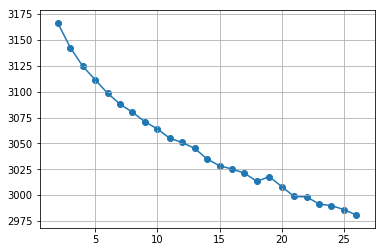

In [9]:
plt.grid()
plt.plot(range(2,27,1),inertia)
plt.scatter(range(2,27,1),inertia)

### Word2vec

In [10]:
word2vec_df = pd.read_pickle('../Data/01_sf_data_word2vec')

In [ ]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=1,n_init=5)
    km.fit(word2vec_df.values)
    inertia.append(km.inertia_)
    i += 1

In [12]:
inertia

[517.1395383325474,
 476.6536960372501,
 450.62134365225177,
 435.54841082760544,
 425.64706698562765,
 413.7678129189519,
 407.1570940036175,
 401.52586124077357,
 396.7113316253197,
 390.83539524599206,
 387.13298953851427,
 382.5036432173621,
 378.9972974674646,
 375.83676477957914,
 373.05431068310673,
 369.8853135769264,
 367.60602571085434,
 366.30038231075565,
 362.0877398654396,
 360.0211776843725,
 358.0065238553028,
 356.638151837075,
 354.5741113403334,
 352.2838071741611]

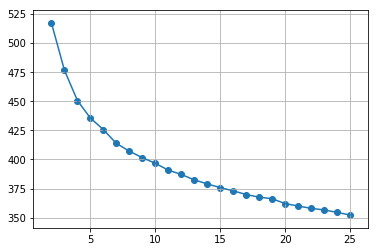

In [13]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)

## Assigning Classes Using TF-IDF
Note that the classes were not ultimately used during plotting due the difficulty in assigning appropriate names to the different classes.
See the Notebook 04_Modeling_TFIDF_NMF.ipynb for the classes used in the plotly graph.

In [23]:
km = KMeans(n_clusters=9,n_jobs=-1,n_init=10)
km.fit(tf_idf_df.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels_df = pd.DataFrame(km.labels_, columns=['labels'])

In [25]:
labels_df.shape

(3364, 1)

In [26]:
df = pd.read_pickle('../Data/01_clean_sf')

In [27]:
df.shape

(3364, 4)

In [28]:
df = df.merge(labels_df,left_index=True,right_index=True)

## Adding SVD

In [29]:
pca = PCA(n_components=3)
pca.fit(tf_idf_df)
tf_idf_df = pd.DataFrame(pca.transform(tf_idf_df))

In [30]:
df = df.merge(tf_idf_df,left_index=True,right_index=True)

In [31]:
df.to_pickle('../Data/01_sf_labeled')